# Распределение Рэлея
Плотность распределения :
$$f(x, \sigma) = \frac{x}{\sigma^2}\exp\left(-\frac{x^2}{2\sigma^2}\right),x \geq 0, \sigma >0$$
$\sigma$ - параметр маштаба

Функция распределения:
$$P(X\leq x) = \int_{0}^{x}f(\xi)d\xi = 1 - \exp\left(-\frac{x^2}{2\sigma^2}\right),x \geq 0 $$
Мат. ожидание:
$$Mean = \sigma \sqrt{\frac{\pi}{2}}$$
Дисперсия:
$$Variance = (2 - \frac{\pi}{2})\sigma^2$$
###### https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import rayleigh
from scipy.stats import norm
import math
%matplotlib inline

## Построим теоретическую плотность распределения и её функцию

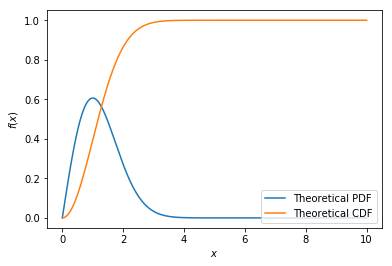

In [34]:
x = np.linspace(0,10,1000)
sigma = 1
pdf = sts.rayleigh.pdf(x)
cdf = sts.rayleigh.cdf(x)

plt.plot(x, pdf, label ='Theoretical PDF')
plt.plot(x, cdf, label ='Theoretical CDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc ='lower right')
plt.show()

## Построение гистограммы по выборке объёма 1000

Text(0.5,0,u'$x$')

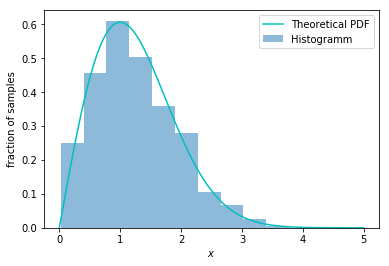

In [64]:
x = np.linspace(0, 5, 1000)
pdf = rayleigh.pdf(x)

rayleigh_rv = rayleigh(0)
sample = rayleigh_rv.rvs(1000)

plt.hist(sample, normed=True, alpha = 0.5, label ='Histogramm')
plt.plot(x, pdf, color = 'c',label ='Theoretical PDF')
plt.legend(loc ='upper right')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

## Функция, которая составляет 1000 выборок объёмом n

In [50]:
def generator(n):
    x = 0
    smpl = np.array([])
    while x < 1000:
        rayleigh_rv = sts.rayleigh(0)
        sample = rayleigh_rv.rvs(n)
        mean = sum(sample)/n
        smpl = np.append(smpl, mean)
        x+=1
    return smpl

## При $\sigma = 1$ $Mean = \sqrt{\frac{\pi}{2}} = const$, $Var = 2 - \frac{\pi}{2} = const$ 

### Расмотрим распределение при n = 5

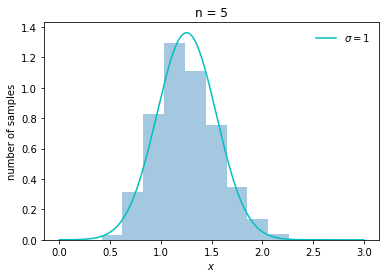

In [51]:
sigma = 1
n = 5
norm = sts.norm(np.sqrt(math.pi/2), np.sqrt((2. - math.pi/2)/n))
x = np.linspace(0, 3, 1000)
pdf = norm.pdf(x)
plt.plot(x, pdf, color = 'c', label="$\sigma=%s$" % sigma)
plt.hist(generator(5), bins = 10, normed=True, histtype='stepfilled', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.title("n = 5")
plt.show()

### Расcмотрим распределение при n = 10

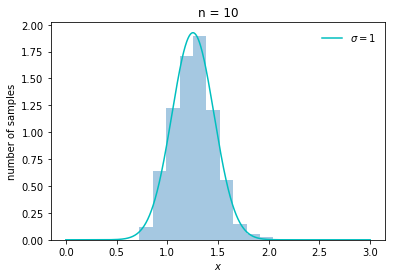

In [53]:
sigma = 1
n = 10
norm = sts.norm(np.sqrt(math.pi/2), np.sqrt((2. - math.pi/2)/n))
x = np.linspace(0, 3, 1000)
pdf = norm.pdf(x)
plt.plot(x, pdf, color = 'c', label="$\sigma=%s$" % sigma)
plt.hist(generator(10), bins = 10, normed=True, histtype='stepfilled', alpha=0.4)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.title("n = 10")
plt.show()

### Расcмотрим распределение при n = 50

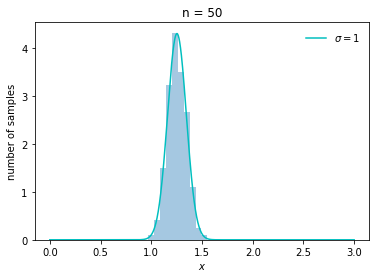

In [49]:
sigma = 1
n = 50
norm = sts.norm(np.sqrt(math.pi/2), np.sqrt((2. - math.pi/2)/n))
x = np.linspace(0, 3, 1000)
pdf = norm.pdf(x)
plt.plot(x, pdf, color = 'c', label="$\sigma=%s$" % sigma)
plt.hist(generator(50), bins = 10, normed=True, histtype='stepfilled', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.title("n = 50")
plt.show()

### C ростом n точность аппроксимации увеличивается. После n = 50 проследивается лишь качественная аппроксимация